In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import itertools
from matplotlib.pyplot import *

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

2.1.2
0.9.0


/Users/alex/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/alex/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


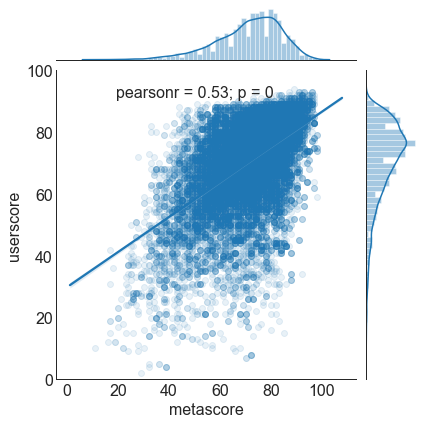

In [2]:
from scipy import stats

# Import data
df = pd.read_csv("https://raw.githubusercontent.com/axelk2014/publicdata/master/metacritic-results.csv")


p=sns.jointplot("metascore", "userscore", df,ylim=(0, 100),kind="reg",scatter_kws={'alpha':0.1})


p=p.annotate(stats.pearsonr,loc='upper left')


In [3]:
from sklearn.metrics import r2_score

# to get the r-squared stat, both series need to be equal length
df1=df.dropna()


print("Total R-squared",r2_score(df1['metascore'],df1['userscore']))


/Users/alex/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/alex/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Total R-squared 0.0246375578588


In [4]:
print("R-squared by Genre")
grouped = df1.groupby('Genre')

def wavg(group):
    y_true = group['metascore']
    y_pred = group['userscore']
    return r2_score(y_true,y_pred)

grouped.apply(wavg)

R-squared by Genre


Genre
Action          0.177404
Adventure       0.336378
Fighting        0.252146
Misc            0.223836
Platform        0.010379
Puzzle          0.426471
Racing          0.106846
Role-Playing   -0.058194
Shooter        -0.039091
Simulation     -0.410312
Sports         -0.831556
Strategy       -1.366932
dtype: float64